In [15]:
#pip install langgraph langsmith
#pip install langchain langchain_groq langchain_community

In [ ]:
groq_api_key='gs.................kg'
langsmith='l................dc'

In [17]:
from langchain_groq import ChatGroq

In [18]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001F0489E86E0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001F0489EA690>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [19]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [20]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [21]:
graph_builder

In [22]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [23]:
graph_builder.add_node("chatbot",chatbot)

In [24]:
graph_builder

In [25]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [26]:
graph=graph_builder.compile()

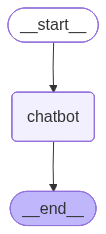

In [27]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass 

In [28]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='The scope of data science is incredibly broad and continues to expand rapidly. It touches nearly every aspect of modern life and business. Here\'s a breakdown of its key areas:\n\n**1. Business and Industry:**\n\n* **Marketing & Sales:** Customer segmentation, personalized recommendations, churn prediction, campaign optimization.\n* **Finance:** Fraud detection, risk assessment, algorithmic trading, credit scoring, financial forecasting.\n* **Healthcare:** Disease prediction, patient risk stratification, drug discovery, medical imaging analysis.\n* **Manufacturing:** Predictive maintenance, quality control, supply chain optimization, process improvement.\n* **E-commerce:** Recommendation systems, product discovery, pricing optimization, customer service automation.\n\n**2. Research and Academia:**\n\n* **Scientific Research:** Analyzing large datasets in fields like astronomy, biology, physics, and climate science.\n* **Social Sciences:** St